# 多臂赌博机

## 2.3 10臂测试平台

在2000个随机生成的k壁赌博机问题，k=10。

在这里做了10个赌博机，即E_nrom和E_std产生了10个随机变量。$\epsilon$分别选择了0, 0.01和0.1。书中提到赌博机的准确率是$1 - \epsilon$，因此理论上随着实验进行0.01会达到最优。

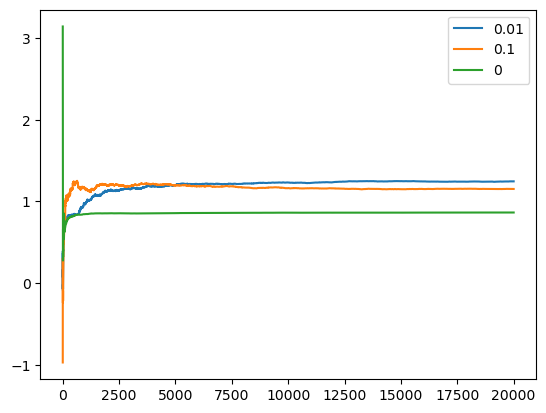

In [51]:
import numpy as np


E_norm = np.random.normal(0, 1, 10)
E_std = map(abs, np.random.normal(0, 1, 10))


E = list(zip(E_norm, E_std))

class A:
    def __init__(self, k, epsilon):
        self.epsilon = epsilon
        self.k = k
        self.q_star = [2 for _ in range(k)]
        self.q_cnt = [0 for _ in range(k)]
        self.q_sum = [0 for _ in range(k)]

    def roll(self):
        if np.random.rand() > self.epsilon:
            return np.argmax(self.q_star)
        return np.random.randint(0, self.k)

    def setq(self, k, v):
        self.q_sum[k] += v
        self.q_cnt[k] += 1
        self.q_star[k] = self.q_sum[k] / self.q_cnt[k]

def round_r(a: A, ep: int):
    ret = [0 for _ in range(ep + 1)]
    for i in range(1, (ep + 1)):
        ret[i] += ret[i - 1]
        select_k = a.roll()
        reward = np.random.normal(*E[select_k])
        ret[i] +=  reward
        a.setq(select_k, reward)
    
    for i in range(1, (ep + 1)):
        ret[i] /= i
    return ret[1:]

ep = 20000
a_1 = A(10, 0.01)
ret_1 = round_r(a_1, ep) 

a_2 = A(10, 0.1)
ret_2 = round_r(a_2, ep)

a_3 = A(10, 0)
ret_3 = round_r(a_3, ep)

import matplotlib.pyplot as plt
axi = np.arange(1, ep + 1)
plt.plot(axi, ret_1, label='0.01')
plt.plot(axi, ret_2, label='0.1')
plt.plot(axi, ret_3, label='0')
plt.legend()
plt.show()




## 基于置信度上界的动作选择

动作-价值估值函数总会存在不确定性，所以试探是必须的。

$A_t \dot= \underset{a}{argmax} [Q_t (a) + c \sqrt{\frac{lnt}{N_t (a)}}]$

其中 $N_t (a)$代表选择a的次数。


## 梯度赌博机算法


$ H_{t + 1} (A_t) \dot= H_t (A_t) + a(R_t - \overline{R}_t) (1 - \pi_t(A_t))$


$H_{t + 1} \dot= H_t(a) - a(R_t - \overline{R}_t) \pi_t(a) \space s.t. a \neq A_t$


$\overline{R}_t \in \mathbb{R}$ 是再时间$t$内收益的平均值。